<a href="https://colab.research.google.com/github/OsirisEscaL/Parkinson_Project/blob/main/Models_Parkinson_HereditaryAtaxias_Features_01a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, SelectFromModel

In [ ]:
rng = np.random.default_rng(seed=42)
random = rng.integers(10000, size=50)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state = 42)

In [ ]:
ds = pd.read_csv('Parkinson_HeredetaryAtaxias.csv')
ds = ds.drop(['Unnamed: 0'], axis=1)
ds_X = ds.iloc[:, 0:-1]
X = ds.iloc[:, 0:-1].values
y = ds.iloc[:, -1].values

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
oversampler = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
oversample_X, oversample_y = oversampler.fit_resample(scaled_X, y)

In [ ]:
features = ds_X.shape[1] + 1
results = {}
results_raw = {}

for num in range(1, features):
    selector = SelectKBest(score_func=f_classif, k=num)
    X_new = selector.fit_transform(oversample_X, oversample_y)
    modelaccuracy = []
    modelprecision = []
    modelsensitivity = []
    modelspecificity = []
    modelbalanced_accuracy = []
    modelf1 = []
    modelroc_auc = []
    for rand in random:
        skfaccuracy = []
        skfprecision = []
        skfsensitivity = []
        skfspecificity = []
        skfbalanced_accuracy = []
        skff1 = []
        skfroc_auc = []
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand)
        for train_index, test_index in stratified_kfold.split(X_new,oversample_y):
            X_train, X_test = X_new[train_index], X_new[test_index]
            y_train, y_test = oversample_y[train_index], oversample_y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=1)
            sensitivity = recall_score(y_test, y_pred, average='binary', pos_label=1)
            specificity = recall_score(y_test, y_pred, average='binary', pos_label=0)
            balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            skfaccuracy.append(accuracy)
            skfprecision.append(precision)
            skfsensitivity.append(sensitivity)
            skfspecificity.append(specificity)
            skfbalanced_accuracy.append(balanced_accuracy)
            skff1.append(f1)
            skfroc_auc.append(roc_auc)
        modelaccuracy.append(np.mean(skfaccuracy))
        modelprecision.append(np.mean(skfprecision))
        modelsensitivity.append(np.mean(skfsensitivity))
        modelspecificity.append(np.mean(skfspecificity))
        modelbalanced_accuracy.append(np.mean(skfbalanced_accuracy))
        modelf1.append(np.mean(skff1))
        modelroc_auc.append(np.mean(skfroc_auc))
    mean_accuracy = np.mean(modelaccuracy)
    mean_precision = np.mean(modelprecision)
    mean_sensitivity = np.mean(modelsensitivity)
    mean_specificity = np.mean(modelspecificity)
    mean_balanced_accuracy = np.mean(modelbalanced_accuracy)
    mean_f1 = np.mean(modelf1)
    mean_roc_auc = np.mean(modelroc_auc)
    std_accuracy = np.std(modelaccuracy)
    std_precision = np.std(modelprecision)
    std_sensitivity = np.std(modelsensitivity)
    std_specificity = np.std(modelspecificity)
    std_balanced_accuracy = np.std(modelbalanced_accuracy)
    std_f1 = np.std(modelf1)
    std_roc_auc = np.std(modelroc_auc)
    results_raw[num-1] = {'Balanced_Accuracy': modelbalanced_accuracy,
                                'Accuracy': modelaccuracy,
                                'Precision': modelprecision,
                                'Sensitivity': modelsensitivity,
                                'Specificity': modelspecificity,
                                'F1': modelf1,
                                'ROC_AUC': modelroc_auc}
    results[num-1] = {'Mean_Balanced_Accuracy': mean_balanced_accuracy,
                            'Std_Balanced_Accuracy': std_balanced_accuracy,
                            'Mean_Accuracy': mean_accuracy, 'Std_Accuracy': std_accuracy,
                            'Mean_Precision': mean_precision, 'Std_Precision': std_precision,
                            'Mean_Sensitivity': mean_sensitivity, 'Std_Sensitivity': std_sensitivity,
                            'Mean_Specificity': mean_specificity, 'Std_Specificity': std_specificity,
                            'Mean_F1': mean_f1, 'Std_F1': std_f1,
                            'Mean_ROC_AUC': mean_roc_auc, 'Std_ROC_AUC': std_roc_auc}

In [ ]:
results_raw_ds = pd.DataFrame(results_raw)
results_raw_ds.to_csv('Results_Raw_SelectKBest_Features_Parkinson_HeredetaryAtaxias.csv')
results_raw_ds

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
Balanced_Accuracy,"[0.6316666666666666, 0.6045454545454545, 0.619...","[0.7287878787878788, 0.7356060606060606, 0.710...","[0.7609090909090908, 0.7613636363636364, 0.781...","[0.7518181818181817, 0.7895454545454544, 0.781...","[0.7601515151515151, 0.7713636363636363, 0.772...","[0.7775757575757575, 0.7822727272727272, 0.779...","[0.7775757575757575, 0.7822727272727272, 0.788...","[0.7775757575757575, 0.7813636363636363, 0.788...","[0.7775757575757575, 0.7713636363636363, 0.788...","[0.7949999999999999, 0.7995454545454544, 0.797...",...,"[0.8763636363636363, 0.8053030303030304, 0.889...","[0.8763636363636363, 0.8318181818181818, 0.889...","[0.8763636363636363, 0.8227272727272729, 0.889...","[0.8672727272727274, 0.8227272727272729, 0.880...","[0.8763636363636363, 0.8127272727272727, 0.880...","[0.8672727272727274, 0.8118181818181819, 0.85,...","[0.8672727272727274, 0.8027272727272727, 0.85,...","[0.8672727272727274, 0.8027272727272727, 0.85,...","[0.8672727272727274, 0.7943939393939394, 0.85,...","[0.8672727272727274, 0.8034848484848485, 0.85,..."
Accuracy,"[0.6272727272727273, 0.5999999999999999, 0.618...","[0.7272727272727272, 0.7363636363636363, 0.709...","[0.7636363636363636, 0.7636363636363637, 0.781...","[0.7545454545454546, 0.790909090909091, 0.7818...","[0.7636363636363637, 0.7727272727272727, 0.772...","[0.7818181818181819, 0.781818181818182, 0.7818...","[0.7818181818181819, 0.781818181818182, 0.7909...","[0.7818181818181819, 0.7818181818181819, 0.790...","[0.7818181818181819, 0.7727272727272727, 0.790...","[0.8, 0.8, 0.8, 0.7818181818181819, 0.8, 0.818...",...,"[0.8818181818181818, 0.8090909090909092, 0.890...","[0.8818181818181818, 0.8363636363636363, 0.890...","[0.8818181818181818, 0.8272727272727272, 0.890...","[0.8727272727272728, 0.8272727272727272, 0.881...","[0.8818181818181818, 0.8181818181818181, 0.881...","[0.8727272727272728, 0.8181818181818181, 0.854...","[0.8727272727272728, 0.809090909090909, 0.8545...","[0.8727272727272728, 0.809090909090909, 0.8545...","[0.8727272727272728, 0.8, 0.8545454545454547, ...","[0.8727272727272728, 0.8090909090909092, 0.854..."
Precision,"[0.6143939393939394, 0.5829545454545454, 0.611...","[0.7268598068598069, 0.7259673659673659, 0.699...","[0.7986111111111112, 0.7845726495726495, 0.817...","[0.7808333333333334, 0.8027350427350427, 0.817...","[0.7914393939393939, 0.7873504273504273, 0.812...","[0.8311111111111111, 0.8087012987012987, 0.827...","[0.8311111111111111, 0.8087012987012987, 0.850...","[0.8311111111111111, 0.8104545454545455, 0.850...","[0.8311111111111111, 0.8060101010101011, 0.850...","[0.8428571428571429, 0.8346608946608948, 0.878...",...,"[0.9777777777777779, 0.8972222222222221, 0.977...","[1.0, 0.9305555555555556, 0.975, 0.95, 1.0, 0....","[1.0, 0.9269841269841269, 0.975, 0.95, 1.0, 0....","[1.0, 0.9269841269841269, 0.9714285714285715, ...","[1.0, 0.9269841269841269, 0.9714285714285715, ...","[1.0, 0.9269841269841269, 0.9714285714285715, ...","[1.0, 0.9269841269841269, 0.9714285714285715, ...","[1.0, 0.9269841269841269, 0.9714285714285715, ...","[1.0, 0.8984126984126984, 0.9714285714285715, ...","[1.0, 0.9019841269841269, 0.9714285714285715, ..."
Sensitivity,"[0.6436363636363637, 0.6272727272727272, 0.605...","[0.7181818181818181, 0.7181818181818181, 0.721...","[0.7309090909090908, 0.7181818181818181, 0.74,...","[0.7309090909090908, 0.7563636363636362, 0.74,...","[0.7309090909090908, 0.738181818181818, 0.7218...","[0.7127272727272727, 0.7236363636363636, 0.721...","[0.7127272727272727, 0.7236363636363636, 0.721...","[0.7127272727272727, 0.7218181818181818, 0.721...","[0.7127272727272727, 0.7018181818181818, 0.721...","[0.7309090909090908, 0.74, 0.7218181818181818,...",...,"[0.7709090909090909, 0.6818181818181819, 0.796...","[0.7527272727272727, 0.7181818181818181, 0.796...","[0.7527272727272727, 0.7, 0.7963636363636363, ...","[0.7345454545454546, 0.7, 0.7781818181818181, ...","[0.7527272727272727, 0.68, 0.77

In [ ]:
results_ds = pd.DataFrame(results).T
number_of_features = results_ds.index + 1
results_ds.insert(0, 'Number_Features', number_of_features)
results_ds.to_csv('Results_SelectKBest_Features_Parkinson_HeredetaryAtaxias.csv')
results_ds.head(5)

,Number_Features,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
0,1,0.605161,0.014345,0.604000,0.013504,0.588145,0.017321,0.624291,0.021650,0.586030,0.018220,0.597038,0.015826,0.605161,0.014345
1,2,0.729227,0.010054,0.730000,0.010164,0.730489,0.018135,0.718909,0.010508,0.739545,0.017057,0.717718,0.010587,0.729227,0.010054
2,3,0.755145,0.013389,0.756182,0.013072,0.771041,0.023737,0.729564,0.017125,0.780727,0.024540,0.739672,0.014127,0.755145,0.013389
3,4,0.770588,0.013914,0.771818,0.013877,0.789719,0.022579,0.743055,0.015515,0.798121,0.022120,0.756127,0.014122,0.770588,0.013914
4,5,0.767258,0.013869,0.768545,0.014108,0.786198,0.027727,0.737818,0.012539,0.796697,0.024580,0.752277,0.014015,0.767258,0.013869


In [ ]:
results_ds_sorted = results_ds.sort_values(by='Mean_Balanced_Accuracy', ascending=False)
results_ds_sorted.to_csv('Results_SelectKBest_Features_Sorted_Parkinson_HeredetaryAtaxias.csv')
results_ds_sorted.head(5)

,Number_Features,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
47,48,0.869148,0.024308,0.872545,0.024154,0.954970,0.034904,0.778691,0.036605,0.959606,0.031335,0.850440,0.029009,0.869148,0.024308
50,51,0.869130,0.024326,0.872545,0.024291,0.955874,0.035579,0.777200,0.035646,0.961061,0.031274,0.849759,0.028230,0.869130,0.024326
48,49,0.866912,0.025664,0.870364,0.025442,0.954792,0.034695,0.773855,0.038086,0.959970,0.030721,0.847567,0.030321,0.866912,0.025664
49,50,0.866512,0.024082,0.870000,0.024001,0.956027,0.035419,0.771964,0.036367,0.961061,0.031591,0.846998,0.028339,0.866512,0.024082
51,52,0.860236,0.022971,0.864000,0.022851,0.954150,0.033450,0.760473,0.039039,0.960000,0.029759,0.838118,0.028180,0.860236,0.022971


In [ ]:
index_5 = results_ds_sorted.index[:10]
features_select_5 = pd.DataFrame(results_raw_ds.iloc[:, index_5]).T
features_select_5.insert(0, 'Number_Features', features_select_5.index + 1)
features_select_5 = features_select_5.reset_index(drop=True)

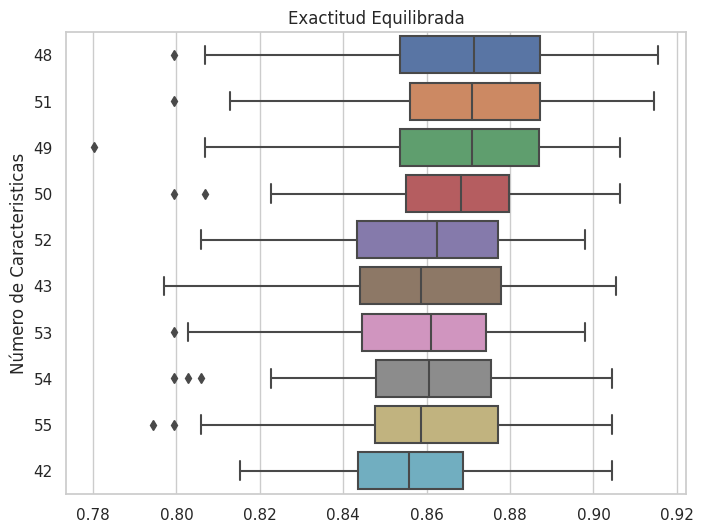

In [ ]:
balanced_accuracy = pd.DataFrame(features_select_5.loc[:,'Balanced_Accuracy'])
caracteristicas = features_select_5.Number_Features

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=balanced_accuracy['Balanced_Accuracy'], orient='h')
plt.title('Exactitud Equilibrada')
plt.ylabel('Número de Caracteristicas')
plt.gca().set_yticklabels(caracteristicas)
plt.savefig('Boxplot_SelectKBest_Features_Balanced_Accuracy_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import scipy.stats as stats

caracteristicas = features_select_5.Number_Features

comparison = {}
alpha = 0.05
for caracteristica1 in caracteristicas:
  val1 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica1, 'Balanced_Accuracy'].values[0]
  for caracteristica2 in caracteristicas:
    val2 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica2, 'Balanced_Accuracy'].values[0]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="greater")
    if p_value < alpha:
      greater = 'La primera muestra es significativamente mayor que la segunda.'
      comparison[caracteristica1, caracteristica2] = {'statistic': statistic,
                                                      'p_value': p_value,
                                                      'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_SelectKBest_Features_Parkinson_HeredetaryAtaxias.csv')
comparison

statistic   p_value                                            greater
48 52    1535.0  0.024907  La primera muestra es significativamente mayor...
   43    1547.0  0.020462  La primera muestra es significativamente mayor...
   53    1572.0  0.013325  La primera muestra es significativamente mayor...
   54    1560.0  0.016421  La primera muestra es significativamente mayor...
   55    1570.5  0.013675  La primera muestra es significativamente mayor...
   42    1626.0  0.004813  La primera muestra es significativamente mayor...
51 52    1543.0  0.021864  La primera muestra es significativamente mayor...
   43    1550.5  0.019304  La primera muestra es significativamente mayor...
   53    1584.5  0.010645  La primera muestra es significativamente mayor...
   54    1585.0  0.010548  La primera muestra es significativamente mayor...
   55    1592.5  0.009187  La primera muestra es significativamente mayor...
   42    1640.5  0.003585  La primera muestra es significativamente mayor...
49 43    1498.0  0.043962  La primera muestra es significativamente mayor...
   53    1528.0  0.027858  La primera muestra es significativamente mayor...
   54    1519.5  0.031809  La primera muestra es significativamente mayor...
   55    1534.5  0.025096  La primera muestra es significativamente mayor...
   42    1587.0  0.010169  La primera muestra es significativamente mayor...
50 53    1508.0  0.037917  La primera muestra es significativamente mayor...
   54    1515.0  0.034099  La primera muestra es significativamente mayor...
   55    1533.0  0.025714  La primera muestra es significativamente mayor...
   42    1589.0  0.009802  La primera muestra es significativamente mayor...

In [ ]:
caracteristicas = features_select_5.Number_Features[0:4]

comparison = {}
alpha = 0.05
for caracteristica1 in caracteristicas:
  val1 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica1, 'Balanced_Accuracy'].values[0]
  for caracteristica2 in caracteristicas:
    val2 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica2, 'Balanced_Accuracy'].values[0]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="two-sided")
    if p_value < alpha:
      greater = 'Hay evidencia de que las muestras tienen distribuciones diferentes.'
    else:
      greater = 'No hay evidencia suficiente para afirmar que las muestras tienen distribuciones diferentes.'
      comparison[caracteristica1, caracteristica2] = {'statistic': statistic,
                                                      'p_value': p_value,
                                                      'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_SelectKBest_Features_Parkinson_HeredetaryAtaxias_parte".csv')
comparison

statistic   p_value                                            greater
48 48    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   51    1249.5       1.0  No hay evidencia suficiente para afirmar que l...
   49    1288.5  0.793271  No hay evidencia suficiente para afirmar que l...
   50    1316.0   0.65151  No hay evidencia suficiente para afirmar que l...
51 48    1250.5       1.0  No hay evidencia suficiente para afirmar que l...
   51    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   49    1298.5  0.740662  No hay evidencia suficiente para afirmar que l...
   50    1331.0  0.578838  No hay evidencia suficiente para afirmar que l...
49 48    1211.5  0.793271  No hay evidencia suficiente para afirmar que l...
   51    1201.5  0.740662  No hay evidencia suficiente para afirmar que l...
   49    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   50    1273.0  0.876696  No hay evidencia suficiente para afirmar que l...
50 48    1184.0   0.65151  No hay evidencia suficiente para afirmar que l...
   51    1169.0  0.578838  No hay evidencia suficiente para afirmar que l...
   49    1227.0  0.876696  No hay evidencia suficiente para afirmar que l...
   50    1250.0       1.0  No hay evidencia suficiente para afirmar que l...

In [ ]:
features = ds_X.shape[1]
results = {}
results_raw = {}

for num in range(1, features):
    selector = SequentialFeatureSelector(model, n_features_to_select=num, direction='forward', cv=5, scoring='balanced_accuracy')
    X_new = selector.fit_transform(oversample_X, oversample_y)
    modelaccuracy = []
    modelprecision = []
    modelsensitivity = []
    modelspecificity = []
    modelbalanced_accuracy = []
    modelf1 = []
    modelroc_auc = []
    for rand in random:
        skfaccuracy = []
        skfprecision = []
        skfsensitivity = []
        skfspecificity = []
        skfbalanced_accuracy = []
        skff1 = []
        skfroc_auc = []
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand)
        for train_index, test_index in stratified_kfold.split(X_new,oversample_y):
            X_train, X_test = X_new[train_index], X_new[test_index]
            y_train, y_test = oversample_y[train_index], oversample_y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=1)
            sensitivity = recall_score(y_test, y_pred, average='binary', pos_label=1)
            specificity = recall_score(y_test, y_pred, average='binary', pos_label=0)
            balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            skfaccuracy.append(accuracy)
            skfprecision.append(precision)
            skfsensitivity.append(sensitivity)
            skfspecificity.append(specificity)
            skfbalanced_accuracy.append(balanced_accuracy)
            skff1.append(f1)
            skfroc_auc.append(roc_auc)
        modelaccuracy.append(np.mean(skfaccuracy))
        modelprecision.append(np.mean(skfprecision))
        modelsensitivity.append(np.mean(skfsensitivity))
        modelspecificity.append(np.mean(skfspecificity))
        modelbalanced_accuracy.append(np.mean(skfbalanced_accuracy))
        modelf1.append(np.mean(skff1))
        modelroc_auc.append(np.mean(skfroc_auc))
    mean_accuracy = np.mean(modelaccuracy)
    mean_precision = np.mean(modelprecision)
    mean_sensitivity = np.mean(modelsensitivity)
    mean_specificity = np.mean(modelspecificity)
    mean_balanced_accuracy = np.mean(modelbalanced_accuracy)
    mean_f1 = np.mean(modelf1)
    mean_roc_auc = np.mean(modelroc_auc)
    std_accuracy = np.std(modelaccuracy)
    std_precision = np.std(modelprecision)
    std_sensitivity = np.std(modelsensitivity)
    std_specificity = np.std(modelspecificity)
    std_balanced_accuracy = np.std(modelbalanced_accuracy)
    std_f1 = np.std(modelf1)
    std_roc_auc = np.std(modelroc_auc)
    results_raw[num-1] = {'Balanced_Accuracy': modelbalanced_accuracy,
                                'Accuracy': modelaccuracy,
                                'Precision': modelprecision,
                                'Sensitivity': modelsensitivity,
                                'Specificity': modelspecificity,
                                'F1': modelf1,
                                'ROC_AUC': modelroc_auc}
    results[num-1] = {'Mean_Balanced_Accuracy': mean_balanced_accuracy,
                            'Std_Balanced_Accuracy': std_balanced_accuracy,
                            'Mean_Accuracy': mean_accuracy, 'Std_Accuracy': std_accuracy,
                            'Mean_Precision': mean_precision, 'Std_Precision': std_precision,
                            'Mean_Sensitivity': mean_sensitivity, 'Std_Sensitivity': std_sensitivity,
                            'Mean_Specificity': mean_specificity, 'Std_Specificity': std_specificity,
                            'Mean_F1': mean_f1, 'Std_F1': std_f1,
                            'Mean_ROC_AUC': mean_roc_auc, 'Std_ROC_AUC': std_roc_auc}

In [ ]:
results_raw_ds = pd.DataFrame(results_raw)
results_raw_ds.to_csv('Results_Raw_Sequential_Features_Parkinson_HeredetaryAtaxias.csv')
results_raw_ds

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Balanced_Accuracy,"[0.6865151515151515, 0.6807575757575757, 0.681...","[0.7142424242424242, 0.7072727272727274, 0.715...","[0.7057575757575758, 0.7172727272727274, 0.724...","[0.6701515151515152, 0.708939393939394, 0.7346...","[0.705, 0.7437878787878789, 0.7504545454545456...","[0.7066666666666668, 0.7256060606060606, 0.750...","[0.6842424242424242, 0.6974242424242425, 0.743...","[0.7122727272727273, 0.716969696969697, 0.7242...","[0.6931818181818181, 0.6987878787878788, 0.714...","[0.6931818181818181, 0.6424242424242423, 0.714...",...,"[0.8707575757575757, 0.761060606060606, 0.8243...","[0.8498484848484849, 0.7968181818181819, 0.823...","[0.8307575757575758, 0.7968181818181819, 0.823...","[0.8398484848484848, 0.776818181818182, 0.8234...","[0.8671212121212122, 0.824090909090909, 0.8325...","[0.8654545454545455, 0.7786363636363637, 0.86,...","[0.8554545454545455, 0.7786363636363637, 0.859...","[0.8663636363636362, 0.7977272727272726, 0.887...","[0.8572727272727272, 0.8142424242424242, 0.868...","[0.8672727272727274, 0.8142424242424242, 0.859..."
Accuracy,"[0.6909090909090908, 0.6818181818181818, 0.681...","[0.7181818181818181, 0.7090909090909092, 0.718...","[0.7090909090909092, 0.7181818181818181, 0.727...","[0.6727272727272726, 0.7090909090909092, 0.736...","[0.709090909090909, 0.7454545454545455, 0.7545...","[0.7090909090909092, 0.7272727272727273, 0.754...","[0.6909090909090908, 0.7, 0.7454545454545455, ...","[0.7181818181818181, 0.7181818181818181, 0.727...","[0.7, 0.7, 0.7181818181818181, 0.7272727272727...","[0.7, 0.6454545454545454, 0.7181818181818181, ...",...,"[0.8727272727272727, 0.7636363636363637, 0.827...","[0.8545454545454545, 0.8, 0.8272727272727274, ...","[0.8363636363636363, 0.8, 0.8272727272727274, ...","[0.8454545454545455, 0.7818181818181819, 0.827...","[0.8727272727272727, 0.8272727272727274, 0.836...","[0.8727272727272728, 0.7818181818181819, 0.863...","[0.8636363636363636, 0.7818181818181819, 0.863...","[0.8727272727272727, 0.8, 0.890909090909091, 0...","[0.8636363636363636, 0.8181818181818181, 0.872...","[0.8727272727272728, 0.8181818181818181, 0.863..."
Precision,"[0.7001221001221001, 0.6621933621933621, 0.690...","[0.7453968253968254, 0.7165567765567766, 0.708...","[0.7155555555555555, 0.722011322011322, 0.7247...","[0.6752380952380952, 0.7005827505827505, 0.735...","[0.7276678876678877, 0.7483116883116884, 0.773...","[0.7156837606837607, 0.7304545454545455, 0.773...","[0.7652991452991452, 0.7278571428571429, 0.808...","[0.7741880341880342, 0.7518453768453769, 0.802...","[0.7805555555555556, 0.7435120435120435, 0.799...","[0.7805555555555556, 0.6652991452991454, 0.799...",...,"[0.9400000000000001, 0.791969696969697, 0.9083...","[0.9349999999999999, 0.860858585858586, 0.9178...","[0.9349999999999999, 0.860858585858586, 0.9178...","[0.9527777777777778, 0.8481601731601731, 0.917...","[0.9777777777777779, 0.8719696969696971, 0.941...","[1.0, 0.8575396825396826, 0.9714285714285715, ...","[1.0, 0.8575396825396826, 0.975, 0.92545454545...","[1.0, 0.8619841269841271, 0.9800000000000001, ...","[1.0, 0.8861111111111111, 0.9777777777777779, ...","[1.0, 0.8861111111111111, 0.975, 0.94545454545..."
Sensitivity,"[0.6563636363636364, 0.66, 0.6636363636363637,...","[0.7163636363636364, 0.6781818181818182, 0.716...","[0.7145454545454546, 0.6981818181818181, 0.716...","[0.6781818181818181, 0.6981818181818181, 0.698...","[0.6963636363636365, 0.7163636363636363, 0.696...","[0.7163636363636364, 0.7163636363636363, 0.696...","[0.6199999999999999, 0.6418181818181818, 0.647...","[0.6381818181818182, 0.6581818181818182, 0.627...","[0.5818181818181818, 0.6218181818181818, 0.607...","[0.5818181818181818, 0.5636363636363636, 0.607...",...,"[0.7945454545454547, 0.6963636363636364, 0.701...","[0.7527272727272727, 0.6981818181818182, 0.7, ...","[0.7145454545454546, 0.6981818181818182, 0.7, ...","[0.7145454545454546, 0.6581818181818182, 0.7, ...","[0.750909090909091, 0.752727272

In [ ]:
results_ds = pd.DataFrame(results).T
number_of_features = results_ds.index + 1
results_ds.insert(0, 'Number_Features', number_of_features)
results_ds.to_csv('Results_Sequential_Features_Parkinson_HeredetaryAtaxias.csv')
results_ds.head(5)

,Number_Features,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
0,1,0.678433,0.013520,0.679818,0.012765,0.683369,0.019411,0.649200,0.023938,0.707667,0.013297,0.654519,0.018700,0.678433,0.013520
1,2,0.734045,0.015712,0.734364,0.015565,0.735877,0.022357,0.727818,0.020034,0.740273,0.026868,0.724481,0.015929,0.734045,0.015712
2,3,0.725464,0.021427,0.726000,0.020811,0.729555,0.026711,0.713745,0.034068,0.737182,0.028074,0.712923,0.026274,0.725464,0.021427
3,4,0.712285,0.021590,0.713273,0.021985,0.720981,0.031774,0.693418,0.029506,0.731152,0.040058,0.697367,0.022490,0.712285,0.021590
4,5,0.724573,0.025982,0.725818,0.025992,0.737179,0.036919,0.698873,0.031088,0.750273,0.044838,0.709023,0.026980,0.724573,0.025982


In [ ]:
results_ds_sorted = results_ds.sort_values(by='Mean_Balanced_Accuracy', ascending=False)
results_ds_sorted.to_csv('Results_Sequential_Features_Sorted_Parkinson_HeredetaryAtaxias.csv')
results_ds_sorted.head(5)

,Number_Features,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
18,19,0.883333,0.021471,0.885091,0.021185,0.927880,0.028668,0.834364,0.029316,0.932303,0.030289,0.872197,0.024301,0.883333,0.021471
21,22,0.883176,0.023911,0.885091,0.023898,0.929861,0.031648,0.834109,0.030880,0.932242,0.031621,0.872368,0.026715,0.883176,0.023911
22,23,0.882652,0.027327,0.884545,0.027409,0.931728,0.036302,0.831273,0.032074,0.934030,0.036831,0.871651,0.029919,0.882652,0.027327
20,21,0.882255,0.023349,0.884000,0.023324,0.928278,0.029814,0.832509,0.030663,0.932000,0.030966,0.870872,0.025860,0.882255,0.023349
19,20,0.882021,0.020781,0.883818,0.020513,0.928306,0.028917,0.831709,0.027998,0.932333,0.031374,0.870511,0.022894,0.882021,0.020781


In [ ]:
index_5 = results_ds_sorted.index[:10]
features_select_5 = pd.DataFrame(results_raw_ds.iloc[:, index_5]).T
features_select_5.insert(0, 'Number_Features', features_select_5.index + 1)
features_select_5 = features_select_5.reset_index(drop=True)

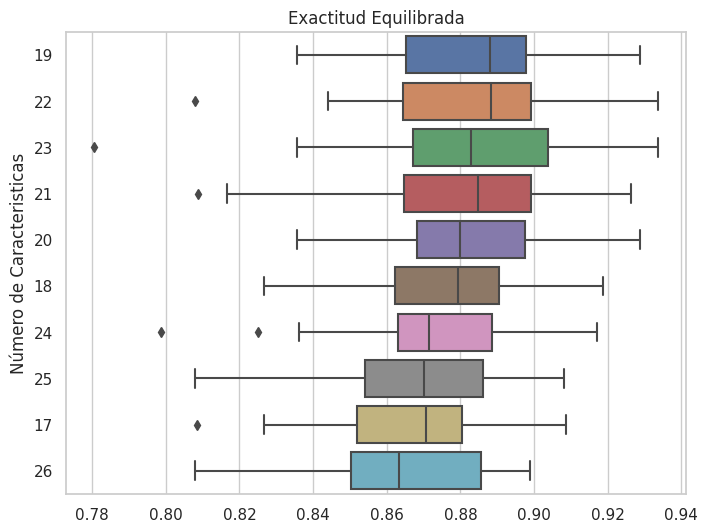

In [ ]:
balanced_accuracy = pd.DataFrame(features_select_5.loc[:,'Balanced_Accuracy'])
modelos = features_select_5.Number_Features

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=balanced_accuracy['Balanced_Accuracy'], orient='h')
plt.title('Exactitud Equilibrada')
plt.ylabel('Número de Caracteristicas')
plt.gca().set_yticklabels(modelos)
plt.savefig('Boxplot_Sequential_Features_Balanced_Accuracy_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import scipy.stats as stats

caracteristicas = features_select_5.Number_Features

comparison = {}
alpha = 0.05
for caracteristica1 in caracteristicas:
  val1 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica1, 'Balanced_Accuracy'].values[0]
  for caracteristica2 in caracteristicas:
    val2 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica2, 'Balanced_Accuracy'].values[0]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="greater")
    if p_value < alpha:
      greater = 'La primera muestra es significativamente mayor que la segunda.'
      comparison[caracteristica1, caracteristica2] = {'statistic': statistic,
                                                      'p_value': p_value,
                                                      'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_Sequential_Features_Parkinson_HeredetaryAtaxias.csv')
comparison

statistic   p_value                                            greater
19 24    1543.0  0.021867  La primera muestra es significativamente mayor...
   25    1703.0  0.000905  La primera muestra es significativamente mayor...
   17    1709.0  0.000786  La primera muestra es significativamente mayor...
   26    1826.0  0.000036  La primera muestra es significativamente mayor...
22 24    1547.0  0.020464  La primera muestra es significativamente mayor...
   25    1709.0  0.000786  La primera muestra es significativamente mayor...
   17    1715.5  0.000673  La primera muestra es significativamente mayor...
   26    1812.5  0.000053  La primera muestra es significativamente mayor...
23 24    1552.5  0.018666  La primera muestra es significativamente mayor...
   25    1688.0   0.00128  La primera muestra es significativamente mayor...
   17    1688.5  0.001265  La primera muestra es significativamente mayor...
   26    1804.5  0.000067  La primera muestra es significativamente mayor...
21 24    1569.0   0.01405  La primera muestra es significativamente mayor...
   25    1708.5  0.000795  La primera muestra es significativamente mayor...
   17    1738.5  0.000383  La primera muestra es significativamente mayor...
   26    1820.0  0.000043  La primera muestra es significativamente mayor...
20 24    1506.5  0.038789  La primera muestra es significativamente mayor...
   25    1646.0  0.003199  La primera muestra es significativamente mayor...
   17    1657.0  0.002534  La primera muestra es significativamente mayor...
   26    1774.0  0.000154  La primera muestra es significativamente mayor...
18 25    1546.5  0.020639  La primera muestra es significativamente mayor...
   17    1560.5  0.016281  La primera muestra es significativamente mayor...
   26    1671.0  0.001872  La primera muestra es significativamente mayor...
24 26    1524.5  0.029442  La primera muestra es significativamente mayor...

In [ ]:
caracteristicas = features_select_5.Number_Features[0:6]

comparison = {}
alpha = 0.05
for caracteristica1 in caracteristicas:
  val1 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica1, 'Balanced_Accuracy'].values[0]
  for caracteristica2 in caracteristicas:
    val2 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica2, 'Balanced_Accuracy'].values[0]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="two-sided")
    if p_value < alpha:
      greater = 'Hay evidencia de que las muestras tienen distribuciones diferentes.'
    else:
      greater = 'No hay evidencia suficiente para afirmar que las muestras tienen distribuciones diferentes.'
      comparison[caracteristica1, caracteristica2] = {'statistic': statistic,
                                                      'p_value': p_value,
                                                      'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_Sequential_Features_Parkinson_HeredetaryAtaxias_parte.csv')
comparison

statistic   p_value                                            greater
19 19    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   22    1244.5  0.972501  No hay evidencia suficiente para afirmar que l...
   23    1206.0  0.764251  No hay evidencia suficiente para afirmar que l...
   21    1245.5  0.977998  No hay evidencia suficiente para afirmar que l...
   20    1303.5  0.714797  No hay evidencia suficiente para afirmar que l...
   18    1421.5  0.238401  No hay evidencia suficiente para afirmar que l...
22 19    1255.5  0.972501  No hay evidencia suficiente para afirmar que l...
   22    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   23    1232.5    0.9067  No hay evidencia suficiente para afirmar que l...
   21    1281.5  0.830763  No hay evidencia suficiente para afirmar que l...
   20    1328.5   0.59076  No hay evidencia suficiente para afirmar que l...
   18    1440.0  0.191398  No hay evidencia suficiente para afirmar que l...
23 19    1294.0  0.764251  No hay evidencia suficiente para afirmar que l...
   22    1267.5    0.9067  No hay evidencia suficiente para afirmar que l...
   23    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   21    1273.5  0.874005  No hay evidencia suficiente para afirmar que l...
   20    1325.0  0.607525  No hay evidencia suficiente para afirmar que l...
   18    1436.5  0.199733  No hay evidencia suficiente para afirmar que l...
21 19    1254.5  0.977998  No hay evidencia suficiente para afirmar que l...
   22    1218.5  0.830763  No hay evidencia suficiente para afirmar que l...
   23    1226.5  0.874005  No hay evidencia suficiente para afirmar que l...
   21    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   20    1332.0  0.574187  No hay evidencia suficiente para afirmar que l...
   18    1439.0  0.193732  No hay evidencia suficiente para afirmar que l...
20 19    1196.5  0.714797  No hay evidencia suficiente para afirmar que l...
   22    1171.5   0.59076  No hay evidencia suficiente para afirmar que l...
   23    1175.0  0.607525  No hay evidencia suficiente para afirmar que l...
   21    1168.0  0.574187  No hay evidencia suficiente para afirmar que l...
   20    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   18    1350.5  0.490544  No hay evidencia suficiente para afirmar que l...
18 19    1078.5  0.238401  No hay evidencia suficiente para afirmar que l...
   22    1060.0  0.191398  No hay evidencia suficiente para afirmar que l...
   23    1063.5  0.199733  No hay evidencia suficiente para afirmar que l...
   21    1061.0  0.193732  No hay evidencia suficiente para afirmar que l...
   20    1149.5  0.490544  No hay evidencia suficiente para afirmar que l...
   18    1250.0       1.0  No hay evidencia suficiente para afirmar que l...

In [ ]:
features = ds_X.shape[1]
results = {}
results_raw = {}

for num in range(1, features):
    selector = SelectFromModel(model, max_features=num)
    X_new = selector.fit_transform(oversample_X, oversample_y)
    modelaccuracy = []
    modelprecision = []
    modelsensitivity = []
    modelspecificity = []
    modelbalanced_accuracy = []
    modelf1 = []
    modelroc_auc = []
    for rand in random:
        skfaccuracy = []
        skfprecision = []
        skfsensitivity = []
        skfspecificity = []
        skfbalanced_accuracy = []
        skff1 = []
        skfroc_auc = []
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand)
        for train_index, test_index in stratified_kfold.split(X_new,oversample_y):
            X_train, X_test = X_new[train_index], X_new[test_index]
            y_train, y_test = oversample_y[train_index], oversample_y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=1)
            sensitivity = recall_score(y_test, y_pred, average='binary', pos_label=1)
            specificity = recall_score(y_test, y_pred, average='binary', pos_label=0)
            balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            skfaccuracy.append(accuracy)
            skfprecision.append(precision)
            skfsensitivity.append(sensitivity)
            skfspecificity.append(specificity)
            skfbalanced_accuracy.append(balanced_accuracy)
            skff1.append(f1)
            skfroc_auc.append(roc_auc)
        modelaccuracy.append(np.mean(skfaccuracy))
        modelprecision.append(np.mean(skfprecision))
        modelsensitivity.append(np.mean(skfsensitivity))
        modelspecificity.append(np.mean(skfspecificity))
        modelbalanced_accuracy.append(np.mean(skfbalanced_accuracy))
        modelf1.append(np.mean(skff1))
        modelroc_auc.append(np.mean(skfroc_auc))
    mean_accuracy = np.mean(modelaccuracy)
    mean_precision = np.mean(modelprecision)
    mean_sensitivity = np.mean(modelsensitivity)
    mean_specificity = np.mean(modelspecificity)
    mean_balanced_accuracy = np.mean(modelbalanced_accuracy)
    mean_f1 = np.mean(modelf1)
    mean_roc_auc = np.mean(modelroc_auc)
    std_accuracy = np.std(modelaccuracy)
    std_precision = np.std(modelprecision)
    std_sensitivity = np.std(modelsensitivity)
    std_specificity = np.std(modelspecificity)
    std_balanced_accuracy = np.std(modelbalanced_accuracy)
    std_f1 = np.std(modelf1)
    std_roc_auc = np.std(modelroc_auc)
    results_raw[num-1] = {'Balanced_Accuracy': modelbalanced_accuracy,
                                'Accuracy': modelaccuracy,
                                'Precision': modelprecision,
                                'Sensitivity': modelsensitivity,
                                'Specificity': modelspecificity,
                                'F1': modelf1,
                                'ROC_AUC': modelroc_auc}
    results[num-1] = {'Mean_Balanced_Accuracy': mean_balanced_accuracy,
                            'Std_Balanced_Accuracy': std_balanced_accuracy,
                            'Mean_Accuracy': mean_accuracy, 'Std_Accuracy': std_accuracy,
                            'Mean_Precision': mean_precision, 'Std_Precision': std_precision,
                            'Mean_Sensitivity': mean_sensitivity, 'Std_Sensitivity': std_sensitivity,
                            'Mean_Specificity': mean_specificity, 'Std_Specificity': std_specificity,
                            'Mean_F1': mean_f1, 'Std_F1': std_f1,
                            'Mean_ROC_AUC': mean_roc_auc, 'Std_ROC_AUC': std_roc_auc}

In [ ]:
results_raw_ds = pd.DataFrame(results_raw)
results_raw_ds.to_csv('Results_Raw_Select_Features_Parkinson_HeredetaryAtaxias.csv')
results_raw_ds

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Balanced_Accuracy,"[0.6706060606060606, 0.6703030303030303, 0.683...","[0.7145454545454545, 0.6892424242424242, 0.667...","[0.7245454545454544, 0.735, 0.7116666666666667...","[0.7803030303030304, 0.7604545454545455, 0.783...","[0.8698484848484849, 0.8807575757575759, 0.852...","[0.888030303030303, 0.8898484848484849, 0.8525...","[0.8531818181818182, 0.8466666666666667, 0.834...","[0.8433333333333334, 0.8559090909090908, 0.843...","[0.8871212121212121, 0.9187878787878787, 0.898...","[0.8954545454545455, 0.917878787878788, 0.9062...",...,"[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898...","[0.8945454545454545, 0.8615151515151517, 0.898..."
Accuracy,"[0.6727272727272726, 0.6727272727272727, 0.681...","[0.7181818181818181, 0.6909090909090908, 0.663...","[0.7272727272727272, 0.7363636363636364, 0.709...","[0.7818181818181819, 0.7636363636363636, 0.781...","[0.8727272727272727, 0.8818181818181818, 0.854...","[0.890909090909091, 0.890909090909091, 0.85454...","[0.8545454545454545, 0.8454545454545455, 0.836...","[0.8454545454545455, 0.8545454545454545, 0.845...","[0.890909090909091, 0.9181818181818183, 0.9, 0...","[0.9, 0.9181818181818183, 0.9090909090909092, ...",...,"[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090...","[0.9, 0.8636363636363636, 0.9, 0.8909090909090..."
Precision,"[0.6497435897435897, 0.6968253968253968, 0.687...","[0.6946520146520146, 0.7054456654456654, 0.686...","[0.7447707847707847, 0.7338744588744589, 0.711...","[0.7954545454545455, 0.7564285714285715, 0.788...","[0.9011111111111111, 0.9218181818181819, 0.892...","[0.9207070707070706, 0.9254545454545454, 0.907...","[0.8444444444444444, 0.848080808080808, 0.8662...","[0.8622222222222222, 0.8853030303030304, 0.879...","[0.9292307692307693, 0.9436363636363636, 0.93,...","[0.9492307692307692, 0.9595959595959596, 0.959...",...,"[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963...","[0.9777777777777779, 0.9191919191919192, 0.963..."
Sensitivity,"[0.6563636363636363, 0.6436363636363636, 0.661...","[0.7109090909090909, 0.6981818181818182, 0.610...","[0.6945454545454546, 0.738181818181818, 0.7036...","[0.7545454545454545, 0.7709090909090909, 0.774...","[0.8290909090909091, 0.8327272727272728, 0.812...","[0.8472727272727273, 0.850909090909091, 0.7945...","[0.8654545454545455, 0.8327272727272728, 0.812...","[0.8290909090909091, 0.8163636363636364, 0.812...","[0.8454545454545455, 0.889090909090909, 0.8672...","[0.8454545454545455, 0.8690909090909091, 0.847...",...,"[0.8072727272727273, 0.7927272727272727, 0.832...","[0.8072727272727273, 0.7927272727272727, 0.832...","[0.8072727272727273, 0.7927272727272727, 0.832...","[0.8072727272727273, 0.7927272727272727, 0.832...","[0.8072727272727273, 0.79272727

In [ ]:
results_ds = pd.DataFrame(results).T
number_of_features = results_ds.index + 1
results_ds.insert(0, 'Number_Features', number_of_features)
results_ds.to_csv('Results_Select_Features_Parkinson_HeredetaryAtaxias.csv')
results_ds.head(5)

,Number_Features,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
0,1,0.681915,0.009982,0.682182,0.009952,0.686835,0.018833,0.658073,0.012041,0.705758,0.014287,0.661052,0.013822,0.681915,0.009982
1,2,0.693312,0.017029,0.693636,0.017177,0.694460,0.018035,0.675018,0.030456,0.711606,0.019338,0.673977,0.022815,0.693312,0.017029
2,3,0.733345,0.012423,0.734182,0.012670,0.737057,0.019891,0.719055,0.015148,0.747636,0.020423,0.719574,0.012613,0.733345,0.012423
3,4,0.778455,0.015298,0.779455,0.015082,0.788104,0.023531,0.760909,0.016497,0.796000,0.027763,0.766262,0.015858,0.778455,0.015298
4,5,0.865955,0.013807,0.867273,0.013727,0.894764,0.017962,0.834545,0.018334,0.897364,0.020336,0.856205,0.014785,0.865955,0.013807


In [ ]:
results_ds_sorted = results_ds.sort_values(by='Mean_Balanced_Accuracy', ascending=False)
results_ds_sorted.to_csv('Results_Select_Features_Sorted_Parkinson_HeredetaryAtaxias.csv')
results_ds_sorted.head(5)

,Number_Features,Mean_Balanced_Accuracy,Std_Balanced_Accuracy,Mean_Accuracy,Std_Accuracy,Mean_Precision,Std_Precision,Mean_Sensitivity,Std_Sensitivity,Mean_Specificity,Std_Specificity,Mean_F1,Std_F1,Mean_ROC_AUC,Std_ROC_AUC
15,16,0.919652,0.018397,0.921455,0.018069,0.963251,0.021707,0.874727,0.027137,0.964576,0.021649,0.912549,0.019318,0.919652,0.018397
16,17,0.916018,0.017375,0.918000,0.017200,0.962618,0.021662,0.867855,0.027460,0.964182,0.021431,0.908150,0.018689,0.916018,0.017375
14,15,0.915021,0.017112,0.917091,0.016826,0.963829,0.021969,0.864436,0.023211,0.965606,0.021494,0.907152,0.017948,0.915021,0.017112
18,19,0.910091,0.020778,0.912182,0.020858,0.966239,0.027526,0.851818,0.028772,0.968364,0.025430,0.900959,0.022647,0.910091,0.020778
17,18,0.905985,0.015918,0.908000,0.015813,0.957846,0.022554,0.851455,0.022018,0.960515,0.020063,0.896753,0.017565,0.905985,0.015918


In [ ]:
index_5 = results_ds_sorted.index[:10]
features_select_5 = pd.DataFrame(results_raw_ds.iloc[:, index_5]).T
features_select_5.insert(0, 'Number_Features', features_select_5.index + 1)
features_select_5 = features_select_5.reset_index(drop=True)

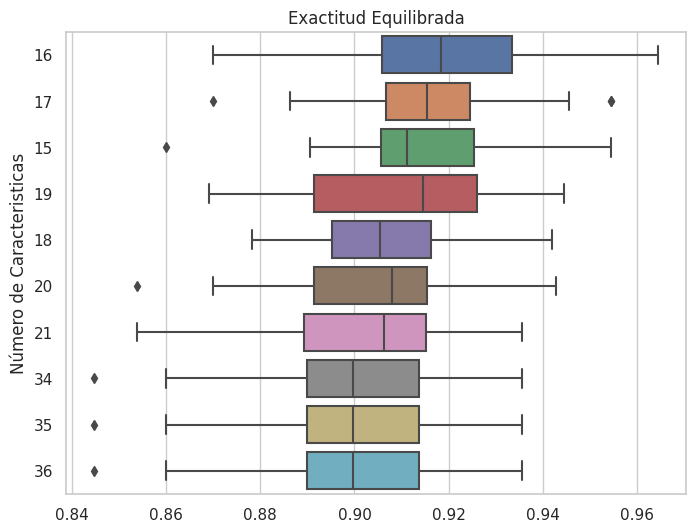

In [ ]:
balanced_accuracy = pd.DataFrame(features_select_5.loc[:,'Balanced_Accuracy'])
modelos = features_select_5.Number_Features

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=balanced_accuracy['Balanced_Accuracy'], orient='h')
plt.title('Exactitud Equilibrada')
plt.ylabel('Número de Caracteristicas')
plt.gca().set_yticklabels(modelos)
plt.savefig('Boxplot_Select_Features_Balanced_Accuracy_Parkinson_HeredetaryAtaxias.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import scipy.stats as stats

caracteristicas = features_select_5.Number_Features

comparison = {}
alpha = 0.05
for caracteristica1 in caracteristicas:
  val1 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica1, 'Balanced_Accuracy'].values[0]
  for caracteristica2 in caracteristicas:
    val2 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica2, 'Balanced_Accuracy'].values[0]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="greater")
    if p_value < alpha:
      greater = 'La primera muestra es significativamente mayor que la segunda.'
      comparison[caracteristica1, caracteristica2] = {'statistic': statistic,
                                                      'p_value': p_value,
                                                      'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_Select_Features_Parkinson_HeredetaryAtaxias.csv')
comparison

statistic   p_value                                            greater
16 19    1567.0  0.014545  La primera muestra es significativamente mayor...
   18    1773.0  0.000158  La primera muestra es significativamente mayor...
   20    1794.5  0.000088  La primera muestra es significativamente mayor...
   21    1851.5  0.000017  La primera muestra es significativamente mayor...
   34    1938.5  0.000001  La primera muestra es significativamente mayor...
   35    1938.5  0.000001  La primera muestra es significativamente mayor...
   36    1938.5  0.000001  La primera muestra es significativamente mayor...
17 18    1660.5   0.00235  La primera muestra es significativamente mayor...
   20    1655.5  0.002615  La primera muestra es significativamente mayor...
   21    1725.5  0.000528  La primera muestra es significativamente mayor...
   34    1835.5  0.000027  La primera muestra es significativamente mayor...
   35    1835.5  0.000027  La primera muestra es significativamente mayor...
   36    1835.5  0.000027  La primera muestra es significativamente mayor...
15 18    1636.5  0.003892  La primera muestra es significativamente mayor...
   20    1619.0  0.005532  La primera muestra es significativamente mayor...
   21    1691.0  0.001194  La primera muestra es significativamente mayor...
   34    1816.0  0.000048  La primera muestra es significativamente mayor...
   35    1816.0  0.000048  La primera muestra es significativamente mayor...
   36    1816.0  0.000048  La primera muestra es significativamente mayor...
19 21    1505.5  0.039335  La primera muestra es significativamente mayor...
   34    1609.0  0.006716  La primera muestra es significativamente mayor...
   35    1609.0  0.006716  La primera muestra es significativamente mayor...
   36    1609.0  0.006716  La primera muestra es significativamente mayor...

In [ ]:
caracteristicas = features_select_5.Number_Features[0:3]

comparison = {}
alpha = 0.05
for caracteristica1 in caracteristicas:
  val1 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica1, 'Balanced_Accuracy'].values[0]
  for caracteristica2 in caracteristicas:
    val2 = features_select_5.loc[features_select_5['Number_Features'] == caracteristica2, 'Balanced_Accuracy'].values[0]
    statistic, p_value = stats.mannwhitneyu(val1, val2, alternative="two-sided")
    if p_value < alpha:
      greater = 'Hay evidencia de que las muestras tienen distribuciones diferentes.'
    else:
      greater = 'No hay evidencia suficiente para afirmar que las muestras tienen distribuciones diferentes.'
      comparison[caracteristica1, caracteristica2] = {'statistic': statistic,
                                                      'p_value': p_value,
                                                      'greater': greater}

In [ ]:
comparison = pd.DataFrame(comparison).T
comparison.to_csv('Results_MannWhitneyU_Select_Features_Parkinson_HeredetaryAtaxias_parte.csv')
comparison

statistic   p_value                                            greater
16 16    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   17    1405.0  0.286735  No hay evidencia suficiente para afirmar que l...
   15    1426.5  0.224948  No hay evidencia suficiente para afirmar que l...
17 16    1095.0  0.286735  No hay evidencia suficiente para afirmar que l...
   17    1250.0       1.0  No hay evidencia suficiente para afirmar que l...
   15    1308.0  0.691778  No hay evidencia suficiente para afirmar que l...
15 16    1073.5  0.224948  No hay evidencia suficiente para afirmar que l...
   17    1192.0  0.691778  No hay evidencia suficiente para afirmar que l...
   15    1250.0       1.0  No hay evidencia suficiente para afirmar que l...